In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset

 49% 13.0M/26.5M [00:00<00:00, 135MB/s]
100% 26.5M/26.5M [00:00<00:00, 189MB/s]


In [ ]:
!unzip /content/news-category-dataset.zip

Archive:  /content/news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

In [ ]:
pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Personalized News

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import ydata_profiling as pp

from wordcloud import WordCloud, STOPWORDS
import tensorflow
import re
import string
import nltk
import os
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

In [ ]:
pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.9 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: vision

### Data Exploration

In [ ]:
import json
data=[]
with open('/content/News_Category_Dataset_v3.json', 'r') as f:
    for line in f:
        content = json.loads(line)
        data.append(content)
df = pd.DataFrame(data=data)
df.head()



link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

         date  
0  2022-09-23  
1  2022-09-23  
2  2022-09-23  
3  2022-09-23  
4  2022-09-22

**Data Description:**

**link:** It is the link to the original article

**headline:** This is the headline of the news article published

**category:** The category in which the news article belongs to

**short_description:** Abstract of the news article

**authors:** The writer/author of the news article

**date:** The publication date of the news article

In [ ]:
# shape of the dataset
print(df.shape)
# total number of unique categories
print("Unique categories:",df['category'].nunique())
print("-------------------------------------------------")
# information about metadata
df.info()

(209527, 6)
Unique categories: 42
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209527 non-null  object
 2   category           209527 non-null  object
 3   short_description  209527 non-null  object
 4   authors            209527 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [ ]:
# general descrption of dataset
df.describe()

link        headline  \
count                                              209527          209527   
unique                                             209486          207996   
top     https://www.huffingtonpost.comhttps://www.wash...  Sunday Roundup   
freq                                                    2              90   

        category short_description authors        date  
count     209527            209527  209527      209527  
unique        42            187022   29169        3890  
top     POLITICS                            2014-03-25  
freq       35602             19712   37418         100

In [ ]:
# produce pandas profiling report
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Key Findings:**

1. Dataset has **42** distinct categories of news article.
2. **'Politics'** is the most common category of news in our dataset.
3. The dataset contains **29169** unique authors.
4. Maximum length of the headline is **320** while median length of the headline is **143**.
5. Maximum length of the description is **1472** while median length of the headline is around **114**.

In [ ]:
# Checking for missing values in the dataset
print(df.isna().sum())
print('There are no null values in the dataset')

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64
There are no null values in the dataset


In [ ]:
df[df['short_description'].apply(lambda x: len(x)==0)].shape

(19712, 6)

The short desctiption has **19712** rows which are empty.

So we drop these rows.

In [ ]:
df = df[~df['short_description'].apply(lambda x: len(x)==0)]

In [ ]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

### Visualization

In [ ]:
#Get count for each category
category_count = df['category'].value_counts()
print(category_count)
print(f'There are {len(category_count)} categories of news')

POLITICS          32441
WELLNESS          17943
ENTERTAINMENT     14774
STYLE & BEAUTY     9802
TRAVEL             9421
PARENTING          8790
FOOD & DRINK       6331
QUEER VOICES       5603
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
BLACK VOICES       4177
THE WORLDPOST      3664
WEDDINGS           3653
PARENTS            3556
DIVORCE            3426
WORLD NEWS         3297
WOMEN              3184
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2103
GREEN              2046
TASTE              1940
RELIGION           1879
SCIENCE            1803
MONEY              1755
STYLE              1567
ENVIRONMENT        1442
U.S. NEWS          1377
ARTS & CULTURE     1339
WORLDPOST          1242
CULTURE & ARTS     1063
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
COLLEGE             921
EDUCATION           902
ARTS            

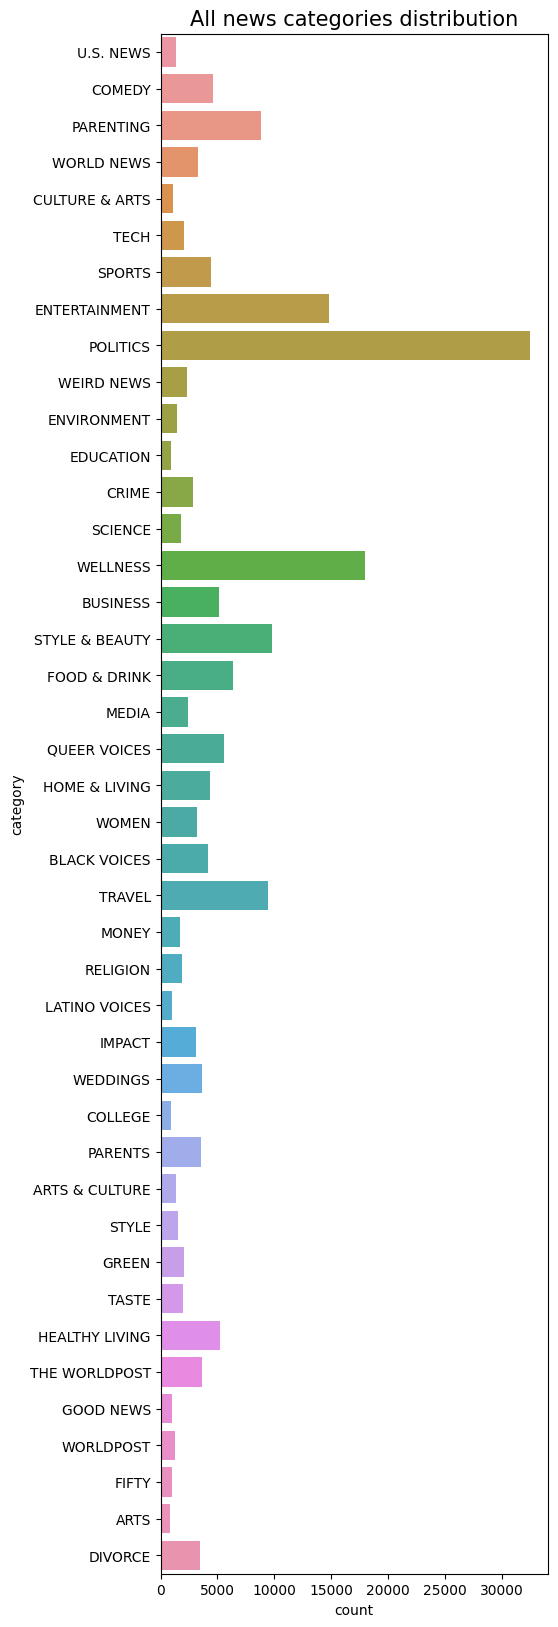

In [ ]:
#Plot horizontal category distribution
plt.figure(figsize = [5, 20])
sns.countplot(y=df["category"], orient = 'h')
plt.title("All news categories distribution", fontsize = 15)
plt.show()

In [ ]:
# Top categories by and number of articles per categories
cat_df = pd.DataFrame(df['category'].value_counts()).reset_index()
cat_df.rename(columns={'index':'news_classes','category':'numcat'}, inplace=True)

# Visualize top 10 categories and proportion of each categories in dataset
plt.figure(figsize=(10,6))
ax = sns.barplot(x = np.array(cat_df.news_classes)[:10], y = np.array(cat_df.numcat)[:10])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height() + 50))
plt.title("TOP 10 Categories of News articles", size=15)
plt.xlabel("Categories of articles", size=14)
plt.xticks(rotation=45)
plt.ylabel("Number of articles", size=14)

Text(0, 0.5, 'Number of articles')

Text(0.5, 1.0, 'Pie Chart of TOP 20 categories of news articles')

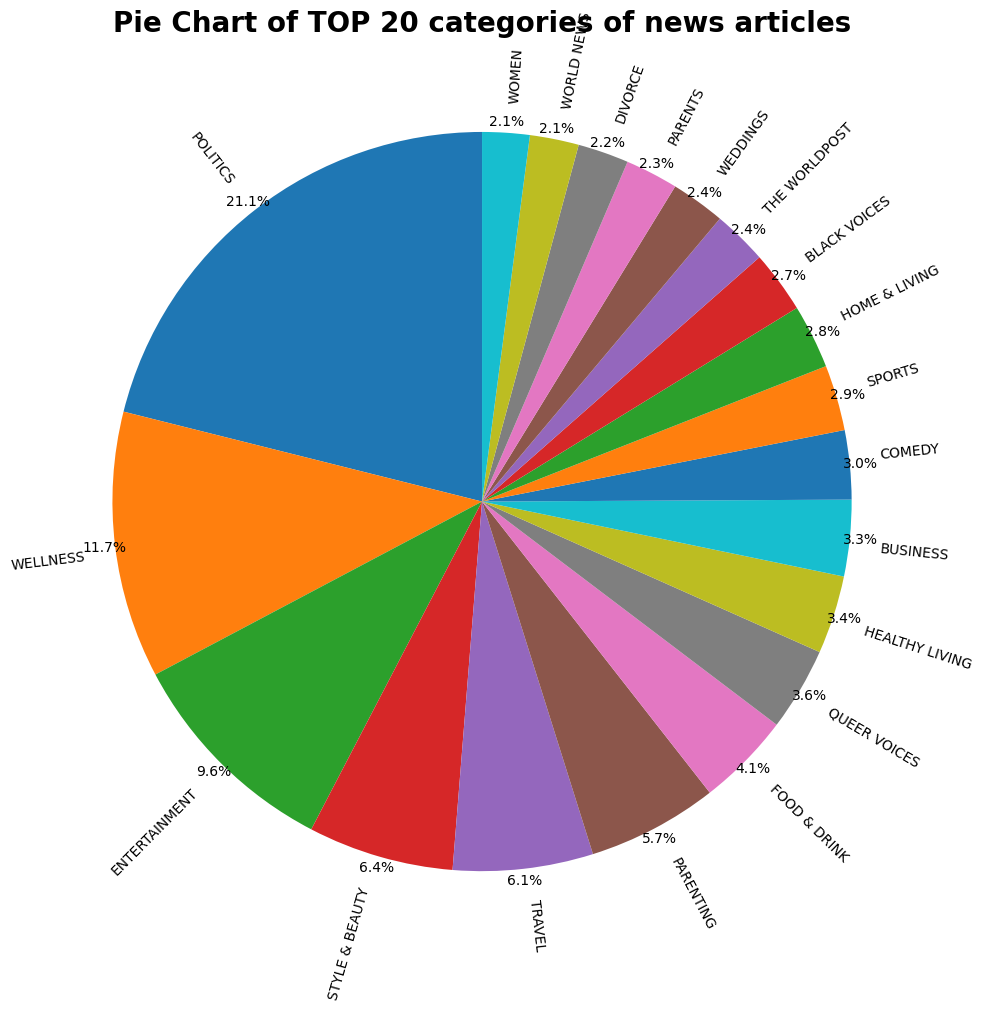

In [ ]:
# plot the pie chart of top 20 categories of news articles
fig = plt.figure(figsize=(12,12))
A = plt.pie(cat_df['numcat'][:20],
            labels=cat_df['news_classes'][:20],
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.08,
            pctdistance=1.03,
            rotatelabels=45
            )

plt.title("Pie Chart of TOP 20 categories of news articles", size=20, weight='bold')

In [ ]:
# create final dataframe of combined headline and short_description
final_df = df.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df['len_news'] = final_df['length_of_news'].map(lambda x: len(x))
final_df.head()

link   category  \
0  https://www.huffpost.com/entry/covid-boosters-...  U.S. NEWS   
1  https://www.huffpost.com/entry/american-airlin...  U.S. NEWS   
2  https://www.huffpost.com/entry/funniest-tweets...     COMEDY   
3  https://www.huffpost.com/entry/funniest-parent...  PARENTING   
4  https://www.huffpost.com/entry/amy-cooper-lose...  U.S. NEWS   

                authors        date  \
0  Carla K. Johnson, AP  2022-09-23   
1        Mary Papenfuss  2022-09-23   
2         Elyse Wanshel  2022-09-23   
3      Caroline Bologna  2022-09-23   
4        Nina Golgowski  2022-09-22   

                                      length_of_news  len_news  
0  Over 4 Million Americans Roll Up Sleeves For O...       230  
1  American Airlines Flyer Charged, Banned For Li...       248  
2  23 Of The Funniest Tweets About Cats And Dogs ...       133  
3  The Funniest Tweets From Parents This Week (Se...       215  
4  Woman Who Called Cops On Black Bird-Watcher Lo...       233

In [ ]:
# maximum length of news in each category
lenmax_df = final_df.groupby('category')['len_news'].max().reset_index().sort_values(by='len_news',ascending=False)
lenmax_df.head()

category  len_news
24        POLITICS      1486
41       WORLDPOST      1424
4          COLLEGE      1225
16  HEALTHY LIVING      1073
38        WELLNESS      1036

In [ ]:
# minimum lenght of news in each category
lenmin_df = final_df.groupby('category')['len_news'].min().reset_index().sort_values(by='len_news',ascending=False)
lenmin_df.head()

category  len_news
0        ARTS        89
35  U.S. NEWS        73
8     DIVORCE        66
12      FIFTY        62
6       CRIME        60

In [ ]:
# plot the bar plots of max and min length of news articles
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.bar(lenmax_df['category'][:10],lenmax_df['len_news'][:10])
plt.xticks(rotation=45)
plt.ylabel("Words length in news categories", size=14)
plt.xlabel("News categories",  size=14)
plt.text(6.5,1400, '''       POLITICS HAS 
 THE LONGEST ARTICLE''', fontsize=12)
plt.title("Max length top 10 news categories", size=14)

plt.subplot(122)
plt.bar(lenmin_df['category'][:10], lenmin_df['len_news'][:10])
plt.xticks(rotation=45)
plt.xlabel("News categories", size=14)
plt.title("Min length of top 10 news categories", size=14)

Text(0.5, 1.0, 'Min length of top 10 news categories')

**Key Findings:**

1. From all the categories of news POLITICS has the most number of articles as well as length of characters in the article (headlines and short-description)
2. After 'POLITICS' category, 'WORLDPOST', 'COLLEGE', 'HEALTHY LIVING','WELLNESS' categories are in top 5 most length of articles
3. 'POLITICS', 'WELLNESS' and 'ENTERTAINTMENT' are top 3 categories having most number of articles in out dataset.

#### Creating WordCloud

(-0.5, 1599.5, 599.5, -0.5)

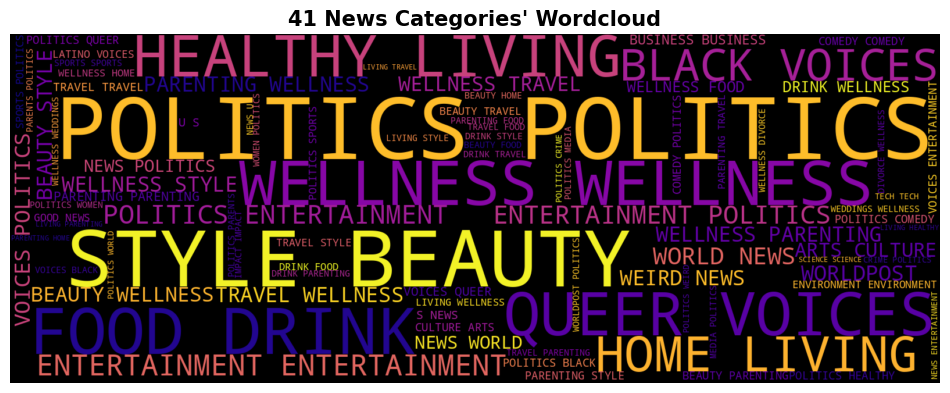

In [ ]:


# wordcloud of categories of news articles in our dataset
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(final_df.category))

plt.title("41 News Categories' Wordcloud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

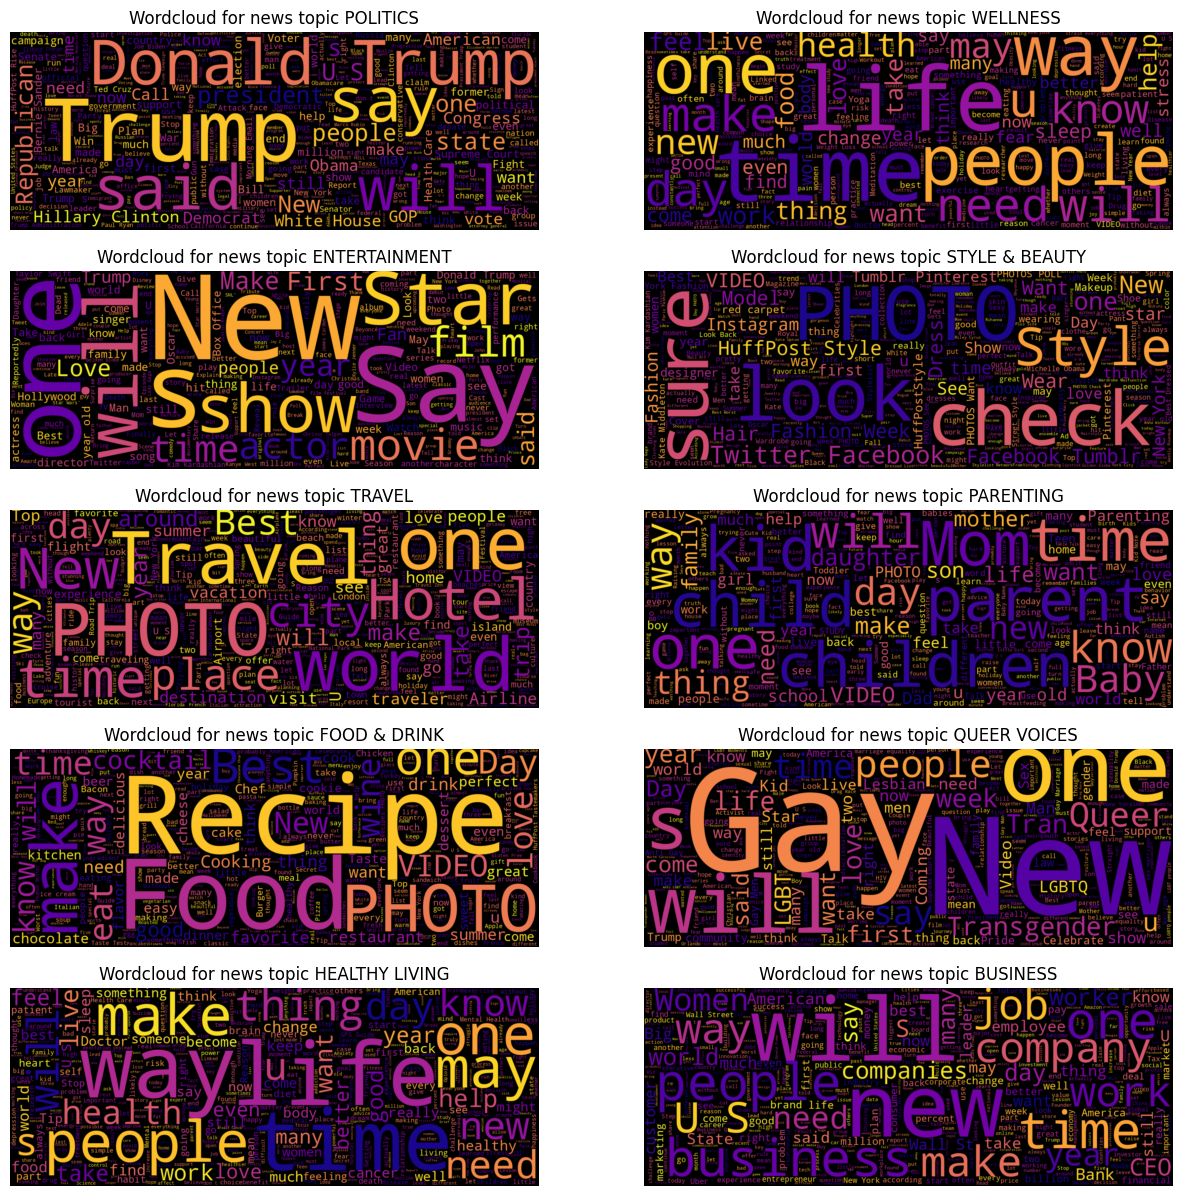

In [ ]:
# create new dataframe of category and length of each news articles in that categories
ndf = final_df.copy()
ndf.drop('len_news', inplace=True, axis=1)

# list of top 10  categories in out dataset
categories = cat_df['news_classes'][:10].to_list()

# list of news articles of each top 10 categories list
articles_list = []

for i in categories:
    cat_ndf = ndf[ndf['category'] == i]
    cat_array = cat_ndf['length_of_news'].values  # array of news articles text in each category
    articles_list.append(cat_array)
    
# create a wordcloud instance
wc1 = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=STOPWORDS)

# plot the figure of 10 wordcloud from out dataset
plt.figure(figsize=(15,15))

for idx, j in enumerate(categories):
    plt.subplot(5,2,idx+1)
    cloud = wc1.generate(' '.join(articles_list[idx]))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for news topic {j}")
    plt.axis('off')

In [ ]:
# only top 15 train data counts
top_categories = list(df["category"].value_counts().nlargest(15).keys())
print(top_categories)

['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'STYLE & BEAUTY', 'TRAVEL', 'PARENTING', 'FOOD & DRINK', 'QUEER VOICES', 'HEALTHY LIVING', 'BUSINESS', 'COMEDY', 'SPORTS', 'HOME & LIVING', 'BLACK VOICES', 'THE WORLDPOST']


In [ ]:

dataset_top = df[df['category'].isin(top_categories)]
plt.figure(figsize = [20, 5])
sns.countplot(x=dataset_top["category"])
plt.title("Top 15 categories distribution", fontsize = 15)
plt.show()

smote analysis

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
#Clean the text
df["text"] = df["headline"] + " " + df["short_description"]
df['text'] = df['text'].map(lambda x: clean_text(x))
X, y = df['text'], df["category"]

In [ ]:
# Preprocess the text data using CountVectorizer and TfidfTransformer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [ ]:
# Perform SMOTE analysis to balance the class distribution
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

Model Training with naive bayes

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Create an instance of the Naive Bayes classifier
nb = MultinomialNB()



In [ ]:
# Apply 5-fold cross-validation and calculate the mean accuracy
scores = cross_val_score(nb, X_smote, y_smote, cv=5)


In [ ]:
mean_accuracy = scores.mean()
print(f"Mean accuracy: {mean_accuracy:.2f}")

Mean accuracy: 0.87


#### Up-Sampleing the data for uniformity

In [ ]:
# Upsampling the data
SEED = 42
df_list = []
#Get news in top 15 categories
for i in top_categories:
    df_list.append(pd.DataFrame(dataset_top[dataset_top["category"]==i]))
for i in range(len(df_list)):
    df_list[i] = pd.DataFrame(df_list[i][df_list[i]["short_description"]!=""])
for i in range(len(df_list)):
    df_list[i] = df_list[i].sample(df_list[0].shape[0], replace=True, random_state=SEED)
df_upsample = pd.concat(df_list)
print(df_upsample.shape)

(486615, 6)


In [ ]:
#Check 5 samples of short description
df_list[0].short_description.iloc[0:5].to_list()

['Ambivalence about a Trump-Cruz battle pushes many Republican fundraisers away from the presidential contest.',
 "The plan is very hazy, but it's different than what other Republicans have proposed.",
 "MeidasTouch's #GOPBetrayedAmerica spot calls out Republican opposition to a commission to investigate the Jan. 6 insurrection.",
 '"The risks of fracking to our health and to our environment are real," state Attorney General Xavier Becerra says.',
 'Sen. Bernie Sanders claims that in the United States, “almost all of the wealth rests in the hands of the few.” He exaggerates']

### Data Cleaning

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

In [ ]:
 import nltk
 nltk.download('stopwords')
 nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
 import nltk
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Clean the text
df_upsample["text"] = df_upsample["headline"] + " " + df_upsample["short_description"]
df_upsample['text'] = df_upsample['text'].map(lambda x: clean_text(x))
X, y = df_upsample['text'], df_upsample["category"]

In [ ]:
#Text after cleaning
print(X.iloc[0])

sheldon adelson top gop donor retreat sideline ambivalence trumpcruz battle push many republican fundraiser away presidential contest


In [ ]:
#Data size after upsampling
print(y.value_counts())

POLITICS          32441
WELLNESS          32441
ENTERTAINMENT     32441
STYLE & BEAUTY    32441
TRAVEL            32441
PARENTING         32441
FOOD & DRINK      32441
QUEER VOICES      32441
HEALTHY LIVING    32441
BUSINESS          32441
COMEDY            32441
SPORTS            32441
HOME & LIVING     32441
BLACK VOICES      32441
THE WORLDPOST     32441
Name: category, dtype: int64


In [ ]:
#Split data into training data and testing data
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_upsample['text'], df_upsample['category'], test_size=0.2, stratify=df_upsample['category'])
le = preprocessing.LabelEncoder()
le.fit(top_categories)
# category to label
y_train_label = le.transform(y_train)
y_test_label = le.transform(y_test)
#Use tf-idf vectorizer to fit news
tf_idf_vectorizer = TfidfVectorizer()
X_train_t = tf_idf_vectorizer.fit_transform(X_train)
X_test_t = tf_idf_vectorizer.transform(X_test)
print(X_train.shape, X_train_t.shape)

(389292,) (389292, 78147)


RNN

In [ ]:
oov_token = "<UNK>"
# maxlen which is the maximum length of one news we will use for our training
maxlen = 200

#Tokenize news
tokenizer = Tokenizer(oov_token = oov_token)
tokenizer.fit_on_texts(df_upsample.text.to_list()) 

# The word_index dictionary assigns a unique index to each unique word present in the training news.                                                                                         
word_index = {}
word_index = tokenizer.word_index
vocabulary = len(word_index) +1
print('Vocabulary : {}'.format(vocabulary))

# Convert news into padded sequences                                               
X_tokenizer = tokenizer.texts_to_sequences(df_upsample.text.to_list())
X_padded = pad_sequences(X_tokenizer, maxlen=maxlen, truncating= 'post',padding = 'pre')
print('Shape of data tensor:', X_padded.shape)

#Split data into training data and testing data with 80%/20%
X_train_padded, X_test_padded, Y_train_dummy, Y_test_dummy = train_test_split(X_padded,Y, test_size = 0.2, random_state = 42)
print(X_train_padded.shape,Y_train_dummy.shape)

print(X_test_padded.shape,Y_test_dummy.shape)
Y.head()

Vocabulary : 79936
Shape of data tensor: (486615, 200)
(389292, 200) (389292, 15)
(97323, 200) (97323, 15)


BLACK VOICES  BUSINESS  COMEDY  ENTERTAINMENT  FOOD & DRINK  \
0             0         0       0              0             0   
1             0         0       0              0             0   
2             0         0       0              0             0   
3             0         0       0              0             0   
4             0         0       0              0             0   

   HEALTHY LIVING  HOME & LIVING  PARENTING  POLITICS  QUEER VOICES  SPORTS  \
0               0              0          0         1             0       0   
1               0              0          0         1             0       0   
2               0              0          0         1             0       0   
3               0              0          0         1             0       0   
4               0              0          0         1             0       0   

   STYLE & BEAUTY  THE WORLDPOST  TRAVEL  WELLNESS  
0               0              0       0         0  
1               0              0       0         0  
2               0              0       0         0  
3               0              0       0         0  
4               0              0       0         0

In [ ]:
print(dict(list(word_index.items())[0:10]))

{'<UNK>': 1, 'photo': 2, 'new': 3, 'one': 4, 'u': 5, 'day': 6, 'time': 7, 'trump': 8, 'year': 9, 'people': 10}


In [ ]:
print("The firts news that has been truned into sequences: \n", X_tokenizer[0])

The firts news that has been truned into sequences: 
 [10683, 13979, 100, 371, 3689, 2944, 5923, 16043, 66384, 773, 1115, 39, 277, 7549, 199, 562, 2667]


In [ ]:
print("The firts news after applying padding: \n", X_train_padded[0])

The firts news after applying padding: 
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0    

In [ ]:
glove_dictionary = {}
with open('/content/glove.6B.200d.txt',encoding="utf8") as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [ ]:
def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1
      
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
  
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
  
    return embedding_matrix_vocab

In [ ]:
# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab( '/content/glove.6B.200d.txt', tokenizer.word_index,embedding_dim)
  
print("Dense vector for first word is => ",
      embedding_matrix_vocab[1])

Dense vector for first word is =>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
from keras.layers import SimpleRNN,Bidirectional

In [ ]:
embedding_matrix_vocab

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10645   ,  0.69933999,  0.098383  , ..., -0.73408002,
        -0.34494001, -0.0493    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.29903999, -0.55792999,  0.36697   , ...,  0.020331  ,
         0.01336   , -0.32787001],
       [-0.073298  ,  0.93831003,  0.75498998, ..., -0.10094   ,
        -0.26897001, -0.48376   ]])

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Embedding,Flatten,Dense,Dropout

In [ ]:
embedding_output_dims =50
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(vocabulary, embedding_output_dims, weights=[embedding_matrix_vocab],input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 50)           3996800   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         14720     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200, 128)         24704     
 nal)                                                            
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 15)               

In [ ]:
#and evaluate model on auc,precision,recall,accuracy
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['AUC','Recall', 'accuracy'])

In [ ]:
import keras
from keras.callbacks import ModelCheckpoint

In [ ]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# fit model to the data
history = model.fit(X_train_padded,Y_train_dummy, batch_size=1000, epochs=9,validation_split=0.2)

# evalute the model
test_loss, test_acc = model.evaluate(X_test_padded,Y_test_dummy, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/9
312/312 [==============================] - 1917s 6s/step - loss: 2.1846 - accuracy: 0.2786 - val_loss: 1.7743 - val_accuracy: 0.4249
Epoch 2/9
312/312 [==============================] - 1916s 6s/step - loss: 1.7445 - accuracy: 0.4382 - val_loss: 1.5065 - val_accuracy: 0.5266
Epoch 3/9
312/312 [==============================] - 1912s 6s/step - loss: 1.5374 - accuracy: 0.5176 - val_loss: 1.3533 - val_accuracy: 0.5854
Epoch 4/9
312/312 [==============================] - 1917s 6s/step - loss: 1.4030 - accuracy: 0.5702 - val_loss: 1.2711 - val_accuracy: 0.6130
Epoch 5/9
312/312 [==============================] - 1918s 6s/step - loss: 1.3014 - accuracy: 0.6060 - val_loss: 1.1791 - val_accuracy: 0.6417
Epoch 6/9
312/312 [==============================] - 1915s 6s/step - loss: 1.2225 - accuracy: 0.6337 - val_loss: 1.1518 - val_accuracy: 0.6550
Epoch 7/9
312/312 [==============================] - 1910s 6s/step - loss: 1.1667 - accuracy: 0.6515 - val_loss: 1.0614 - val_accuracy: 0.6885

In [ ]:
from keras.layers import SimpleRNN,Bidirectional